# Task 1: Language model inference

The goal if this first task is to familiarize yourself with the huggingface transformers and dataset libraries. You will learn how to load and tokenize a dataset, how to load a pre-trained language model, and finally, how to run a model in inference mode.

Your task is to complete the missing code blocks below.

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch

from datasets import load_dataset, load_dataset_builder, get_dataset_split_names, get_dataset_config_names
from transformers import XGLMTokenizer, XGLMTokenizerFast, XGLMForCausalLM, AutoModelForCausalLM, AutoTokenizer, GenerationConfig

# set up figure parameters to make them look nice
plt.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['font.family'] = "cmr10"
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 11})

## Explore dataset

In [2]:
DATA_SET_NAME = "facebook/flores" # specify dataset name
MODEL_NAME = "facebook/xglm-564M" # specify model name
# MODEL_NAME = "gpt2" # specify model name

In [3]:
# Explore a dataset
LANGUAGE_CODE = "deu_Latn" # Language to explore

# covered language codes can be found here: https://github.com/openlanguagedata/flores?tab=readme-ov-file#language-coverage

ds_builder = load_dataset_builder(DATA_SET_NAME, LANGUAGE_CODE, trust_remote_code=True)
print(ds_builder.info.description) # print the dataset description

The creation of FLORES-200 doubles the existing language coverage of FLORES-101. 
Given the nature of the new languages, which have less standardization and require 
more specialized professional translations, the verification process became more complex. 
This required modifications to the translation workflow. FLORES-200 has several languages 
which were not translated from English. Specifically, several languages were translated 
from Spanish, French, Russian and Modern Standard Arabic. Moreover, FLORES-200 also 
includes two script alternatives for four languages. FLORES-200 consists of translations 
from 842 distinct web articles, totaling 3001 sentences. These sentences are divided 
into three splits: dev, devtest, and test (hidden). On average, sentences are approximately 
21 words long.



In [5]:
# print the features (columns) of the dataset
print(ds_builder.info.features)

{'id': Value(dtype='int32', id=None), 'URL': Value(dtype='string', id=None), 'domain': Value(dtype='string', id=None), 'topic': Value(dtype='string', id=None), 'has_image': Value(dtype='int32', id=None), 'has_hyperlink': Value(dtype='int32', id=None), 'sentence': Value(dtype='string', id=None)}


In [12]:
# get the available splits
dataset = load_dataset(
    DATA_SET_NAME, LANGUAGE_CODE, split="dev", trust_remote_code=True
)
print(dataset.info.splits)

{'dev': SplitInfo(name='dev', num_bytes=269134, num_examples=997, shard_lengths=None, dataset_name='flores'), 'devtest': SplitInfo(name='devtest', num_bytes=280255, num_examples=1012, shard_lengths=None, dataset_name='flores')}


## Load data, tokenize, and batchify

In [14]:
# specify languages
LANGUAGES = [
    "eng_Latn",
    "spa_Latn",
    "ita_Latn",
    "deu_Latn",
    "arb_Arab",
    "tel_Telu",
    "tam_Taml",
    "quy_Latn"
]

In [16]:
# load flores data for each language
dataset_per_lang = {}
for language in LANGUAGES:
    print(f"Loading dataset for {language}", end="... ")
    dataset_per_lang[language] = {}
    dataset_per_lang[language]["dataset"] = load_dataset(
        DATA_SET_NAME,
        language,
        split="dev",
        trust_remote_code=True,
        cache_dir="../cache/languages",
    )

    # add a dataloader key set to None, they are defined in the cell tagged
    # @dataloader-creation
    dataset_per_lang[language]["dataloader"] = None 
    print("done")

Loading dataset for eng_Latn... done
Loading dataset for spa_Latn... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done
Loading dataset for ita_Latn... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done
Loading dataset for deu_Latn... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done
Loading dataset for arb_Arab... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done
Loading dataset for tel_Telu... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done
Loading dataset for tam_Taml... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done
Loading dataset for quy_Latn... 

Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

done


In [ ]:
# let's look at the English subset
print(dataset_per_lang["eng_Latn"].info.features)

In [ ]:
# let's look at an individual sample from the dataset
# TODO: your code goes here

In [ ]:
# tokenize the data

# load a pre-trained tokenizer from the huggingface hub
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# gpt2 does not have a padding token, so we have to add it manually
if MODEL_NAME == "gpt2":
    tokenizer.add_special_tokens({'pad_token': tokenizer.unk_token})

# specify the tokenization function
def tokenization(example):
    # fill in here
    pass

# TODO: your code goes here

In [ ]:
# let's take a look at a tokenized sample
# TODO: your code goes here

In [ ]:
# construct a pytorch data loader for each dataset
BATCH_SIZE = 2  # for testing purposes, we start with a batch size of 2. You can change this later.

for language in dataset_per_lang:
    dataset_per_lang[language]["dataloader"] = torch.utils.data.DataLoader(
        dataset_per_lang[language]["dataset"], batch_size=BATCH_SIZE, shuffle=True
    )

## Load model

In [ ]:
# load pre-trained model from the huggingface hub
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
# put the model into evaluation mode
model.eval()

In [31]:
losses = {lang: [] for lang in LANGUAGES} # store per-batch losses for each language

# iterate over the dataset for each language and compute the cross-entropy loss per batch 
# TODO: your code goes here

losses["eng_Latn"].append(np.linspace(0, 1, 10))
losses["eng_Latn"].append(np.linspace(1, 0, 10))

## Visualize loss per language

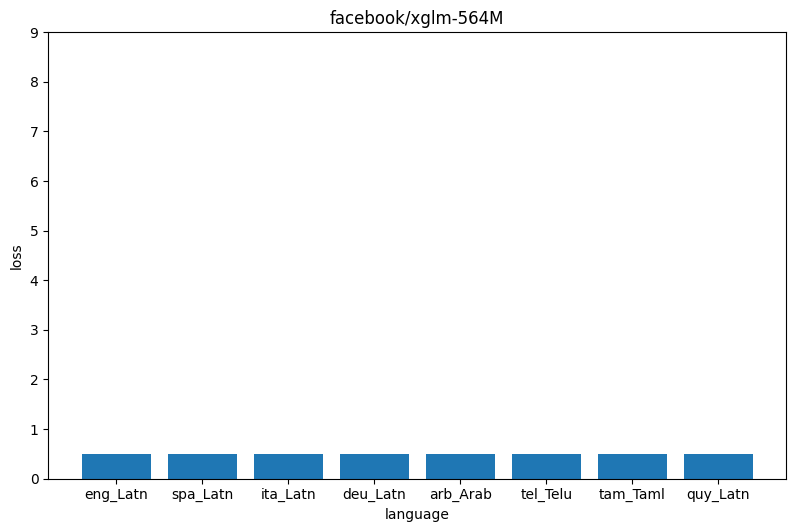

In [33]:
# create a figure
fig, axes = plt.subplots(figsize=(8, 5))

# create a bar plot for each language
x = np.arange(len(LANGUAGES))
y = [np.mean(losses["eng_Latn"][1]) for language in LANGUAGES]

axes.bar(x, y)

fig.tight_layout()

# format plot
axes.set_xlabel("Language") # x-axis label
axes.set_xticks(range(len(LANGUAGES))) # x-axis ticks
axes.set_xticklabels(losses.keys()) # x-axis tick labels
axes.set_ylabel("Loss") # y-axis label
axes.set_ylim(0, 9) # range of y-axis
axes.set_title(MODEL_NAME); # title
axes.grid(True, which='major', color='k', linestyle='-', alpha=0.2)
axes.grid(True, which='minor', color='k', linestyle='--', alpha=0.1)
axes.minorticks_on()

## Comparing XGLM to GPT2

Your next task is to re-run the analysis above, but using `gpt2` as the pre-trained language model. For this exercise, focus on your native language, unless it's English or isn't covered by flores. In that case, pick another language that you can read well. 

Compare the language modeling loss of XGLM and GPT2. What do you observe? Investigate the differences in tokenization for XGLM and GPT2. What do you observe? How can the good (or bad) performance of GPT2 be explained?

In [ ]:
# TODO: your code goes here